In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/train.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras import layers
from keras.layers import Dense, Conv2D,Conv2DTranspose, MaxPooling2D, UpSampling2D,AveragePooling2D,GlobalAveragePooling2D,concatenate,Add,Activation,Reshape,Multiply
from keras.callbacks import EarlyStopping
import os
from keras.optimizers import Adam
from glob import glob
from PIL import Image, ImageOps
import random

In [ ]:
def horizontal_flip(image):
    return image[:, ::-1]

In [ ]:
def vertical_flip(image):
    return image[::-1, :]

In [ ]:
image_files = [os.path.join('/content/Train/high', f) for f in os.listdir('/content/Train/high') if f.endswith(('png', 'jpg', 'jpeg'))]
print(f"Found {len(image_files)} images.")


Found 485 images.


In [ ]:
y_img = []
for file in image_files:
    img = Image.open(file)
    img = img.resize((256,256))  # Resize images if necessary
    img_array = np.array(img)
    img_array1 = horizontal_flip(img_array)
    img_array2 = vertical_flip(img_array)
    # img_array3 = vertical_flip(img_array1)
    y_img.append(img_array)
    y_img.append(img_array1)
    y_img.append(img_array2)
    # y_img.append(img_array3)


y_img = np.array(y_img)

In [ ]:
low_image_files = [os.path.join('/content/Train/low', f) for f in os.listdir('/content/Train/low') if f.endswith(('png', 'jpg', 'jpeg'))]
print(f"Found {len(image_files)} images.")

Found 485 images.


In [ ]:
x_img = []
for file in low_image_files:
    img = Image.open(file)
    img = img.resize((256,256))  # Resize images if necessary
    img_array = np.array(img)
    img_array1= horizontal_flip(img_array)
    img_array2= vertical_flip(img_array)
    # img_array3= vertical_flip(img_array1)
    x_img.append(img_array)
    x_img.append(img_array1)
    x_img.append(img_array2)
    # x_img.append(img_array3)

x_img = np.array(x_img)

In [ ]:
# normalize the image data
x_img = x_img.astype('float32') / 255
y_img = y_img.astype('float32') / 255

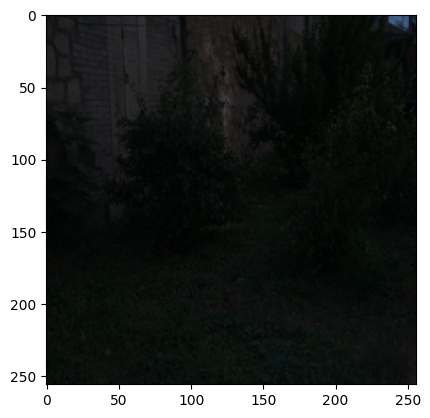

In [ ]:
# randomly select input image
index = np.random.randint(len(x_img))
# plot the image
plt.imshow(x_img[index])
# plt.gray()

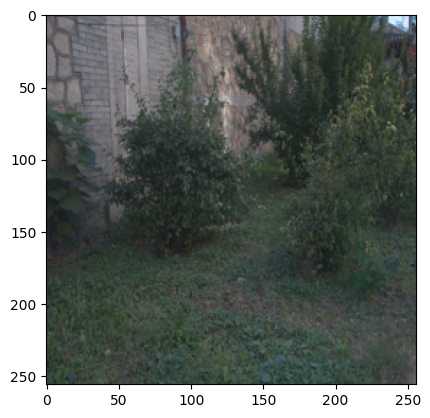

In [ ]:
plt.imshow(y_img[index])

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, test_size=0.2, random_state=42)

# Auto Encoder-Decoder Model

In [ ]:
Model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(256, 256, 3)),
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same"),
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same"),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
    Conv2D(filters=3, kernel_size=(3, 3), activation="relu", padding="same"),
])
Model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["accuracy"])
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_22 (Conv2D)          (None, 256, 256, 16)      9232      
                                                                 
 conv2d_23 (Conv2D)          (None, 256, 256, 16)      2320      
                                                                 
 conv2d_24 (Conv2D)          (None, 256, 256, 64)      9280      
                                                                 
 conv2d_25 (Conv2D)          (None, 256, 256, 3)       1731      
                                                                 
Total params: 24355 (95.14 KB)
Trainable params: 24355 (95.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
73/73 [==============================] - 119s 2s/step - loss: 0.0361 - accuracy: 0.5005 - val_loss: 0.0299 - val_accuracy: 0.5499
Epoch 2/10
73/73 [==============================] - 118s 2s/step - loss: 0.0290 - accuracy: 0.5467 - val_loss: 0.0261 - val_accuracy: 0.5485
Epoch 3/10
73/73 [==============================] - 118s 2s/step - loss: 0.0280 - accuracy: 0.5387 - val_loss: 0.0259 - val_accuracy: 0.5508
Epoch 4/10
73/73 [==============================] - 118s 2s/step - loss: 0.0260 - accuracy: 0.5987 - val_loss: 0.0241 - val_accuracy: 0.5856
Epoch 5/10
73/73 [==============================] - 118s 2s/step - loss: 0.0251 - accuracy: 0.6365 - val_loss: 0.0248 - val_accuracy: 0.5234
Epoch 6/10
73/73 [==============================] - 119s 2s/step - loss: 0.0243 - accuracy: 0.6452 - val_loss: 0.0248 - val_accuracy: 0.5920
Epoch 7/10
73/73 [==============================] - 117s 2s/step - loss: 0.0242 - accuracy: 0.6650 - val_loss: 0.0236 - val_accuracy: 0.6928
Epoch 8/10
73

In [ ]:
psnr = 0
for i in range(len(x_img)):
  pred = Model.predict(x_img[i].reshape(1,256,256,3))
  m = np.mean((y_img[i]-pred)**2)
  psnr += 10*np.log10(1/m)

In [ ]:
psnr/len(x_img)

17.57817633987152

# Zero_Dce_Model

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
MAX_TRAIN_IMAGES = 400

def load_data(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = image / 255.0
    return image

def data_generator(low_light_images):
    dataset = tf.data.Dataset.from_tensor_slices((low_light_images))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset

train_low_light_images = sorted(glob("/content/Train/low/*"))[:MAX_TRAIN_IMAGES]
val_low_light_images = sorted(glob("/content/Train/low/*"))[MAX_TRAIN_IMAGES:]
test_low_light_images = sorted(glob("/content/Train/low/*"))


train_dataset = data_generator(train_low_light_images)
val_dataset = data_generator(val_low_light_images)

print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)


Train Dataset: <_BatchDataset element_spec=TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32, name=None)>
Validation Dataset: <_BatchDataset element_spec=TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32, name=None)>


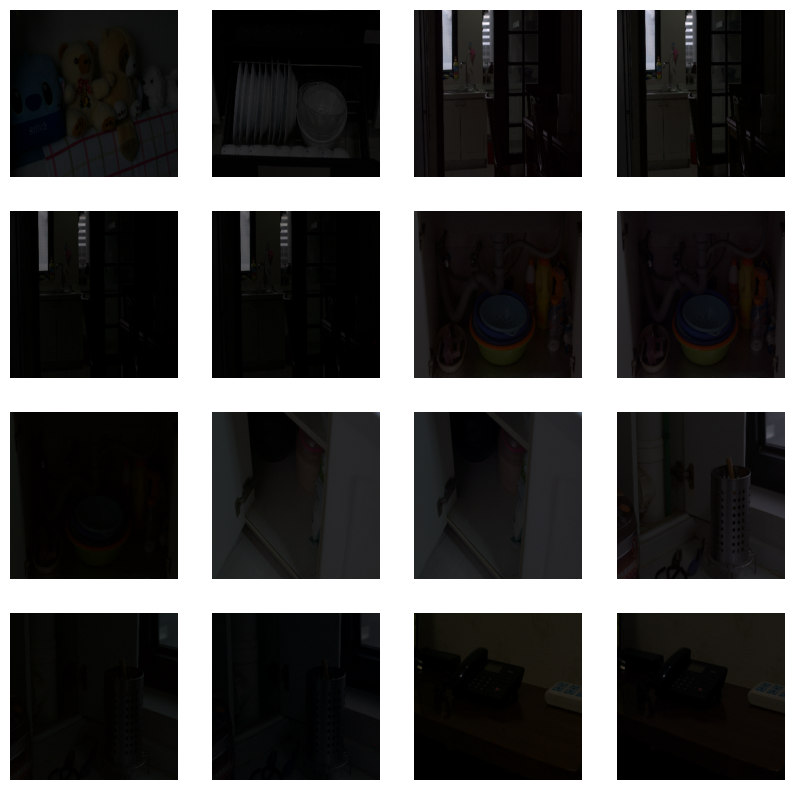

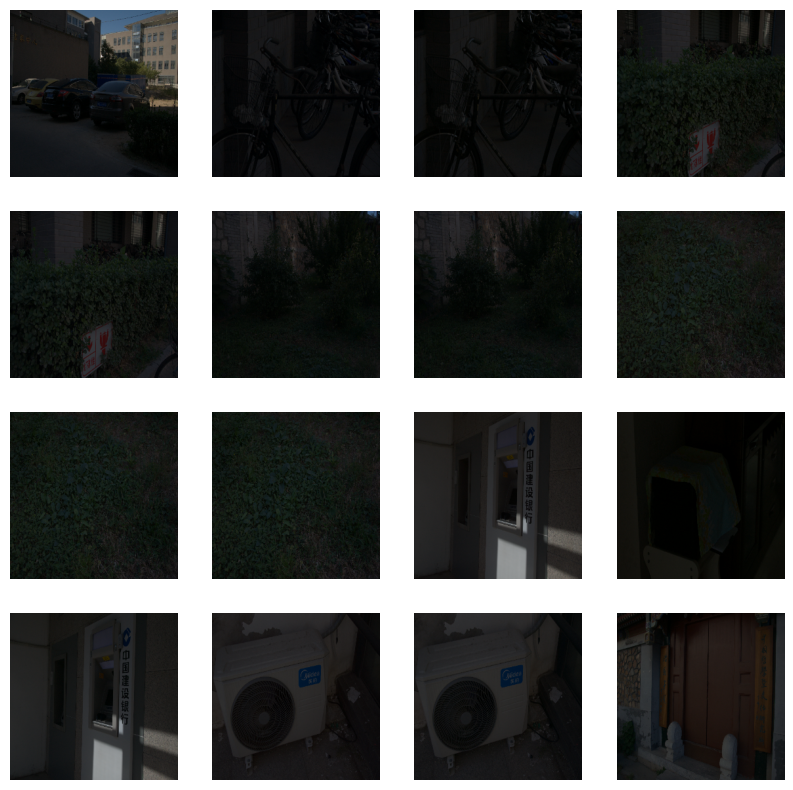

In [ ]:
def show_batch(image_batch):
    plt.figure(figsize=(10, 10))
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i])
        plt.axis("off")

# Get a batch of images from the train dataset
for image_batch in train_dataset.take(1):
    show_batch(image_batch.numpy())
    break

# Get a batch of images from the validation dataset
for image_batch in val_dataset.take(1):
    show_batch(image_batch.numpy())
    break

In [ ]:
def build_dce_net():
    """
    Builds the Deep Curve Estimation (DCE) network model.

    Returns:
        A Keras model representing the DCE-Net.
    """
    # Input layer for the model
    input_layer = keras.Input(shape=[None, None, 3])

    # First four convolutional layers with ReLU activation
    conv_layer1 = layers.Conv2D(
        filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
    )(input_layer)

    conv_layer2 = layers.Conv2D(
        filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
    )(conv_layer1)

    conv_layer3 = layers.Conv2D(
        filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
    )(conv_layer2)

    conv_layer4 = layers.Conv2D(
        filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
    )(conv_layer3)

    # Concatenation of the third and fourth convolutional layers
    concat1 = layers.Concatenate(axis=-1)([conv_layer4, conv_layer3])

    # Fifth convolutional layer after concatenation
    conv_layer5 = layers.Conv2D(
        filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
    )(concat1)

    # Concatenation of the fifth layer with the second convolutional layer
    concat2 = layers.Concatenate(axis=-1)([conv_layer5, conv_layer2])

    # Sixth convolutional layer after the second concatenation
    conv_layer6 = layers.Conv2D(
        filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"
    )(concat2)

    # Final concatenation with the first convolutional layer
    concat3 = layers.Concatenate(axis=-1)([conv_layer6, conv_layer1])

    # Output layer with tanh activation to generate the enhancement maps
    output_layer = layers.Conv2D(
        filters=24, kernel_size=(3, 3), strides=(1, 1), activation="tanh", padding="same"
    )(concat3)

    # Building the Keras model
    dce_net_model = keras.Model(inputs=input_layer, outputs=output_layer)

    return dce_net_model


In [ ]:
def color_constancy_loss(image):

    # Calculate the mean value for each color channel (red, green, blue)
    mean_channels = tf.reduce_mean(image, axis=(1, 2), keepdims=True)
    mean_red = mean_channels[:, :, :, 0]
    mean_green = mean_channels[:, :, :, 1]
    mean_blue = mean_channels[:, :, :, 2]

    # Compute the squared differences between the mean values of the channels
    diff_red_green = tf.square(mean_red - mean_green)
    diff_red_blue = tf.square(mean_red - mean_blue)
    diff_green_blue = tf.square(mean_green - mean_blue)

    # Calculate the color constancy loss
    color_loss = tf.sqrt(tf.square(diff_red_green) + tf.square(diff_red_blue) + tf.square(diff_green_blue))

    return color_loss

In [ ]:
def exposure_loss(image, desired_mean=0.6):


    # Calculate the mean intensity across the color channels for each pixel
    mean_intensity = tf.reduce_mean(image, axis=3, keepdims=True)

    # Perform average pooling to get the local average intensity values
    local_mean = tf.nn.avg_pool2d(mean_intensity, ksize=16, strides=16, padding="VALID")

    # Compute the exposure loss as the mean squared difference from the desired mean value
    loss = tf.reduce_mean(tf.square(local_mean - desired_mean))

    return loss

In [ ]:
def illumination_smoothness_loss(enhancement_map):
    batch_dim = tf.shape(enhancement_map)[0]
    height_dim = tf.shape(enhancement_map)[1]
    width_dim = tf.shape(enhancement_map)[2]

    # Compute the count of height and width elements for normalization
    height_elements = (tf.shape(enhancement_map)[2] - 1) * tf.shape(enhancement_map)[3]
    width_elements = tf.shape(enhancement_map)[2] * (tf.shape(enhancement_map)[3] - 1)

    # Calculate the total variation across height and width dimensions
    height_variation = tf.reduce_sum(tf.square(enhancement_map[:, 1:, :, :] - enhancement_map[:, :height_dim - 1, :, :]))
    width_variation = tf.reduce_sum(tf.square(enhancement_map[:, :, 1:, :] - enhancement_map[:, :, :width_dim - 1, :]))

    # Convert batch size and element counts to float for normalization
    batch_dim_float = tf.cast(batch_dim, dtype=tf.float32)
    height_elements_float = tf.cast(height_elements, dtype=tf.float32)
    width_elements_float = tf.cast(width_elements, dtype=tf.float32)

    # Compute the normalized smoothness loss
    smoothness_loss = 2 * (height_variation / height_elements_float + width_variation / width_elements_float) / batch_dim_float

    return smoothness_loss

In [ ]:
class CustomDCE(keras.Model):
    def __init__(self, **kwargs):
        super(CustomDCE, self).__init__(**kwargs)
        self.enhance_net = build_dce_net()

    def compile(self, lr, **kwargs):
        super(CustomDCE, self).compile(**kwargs)
        self.opt = keras.optimizers.Adam(learning_rate=lr)

    def enhance_image(self, input_image, enhancement_factors):
        """Apply enhancement factors progressively to the input image."""
        stage_1 = enhancement_factors[:, :, :, :3]
        stage_2 = enhancement_factors[:, :, :, 3:6]
        stage_3 = enhancement_factors[:, :, :, 6:9]
        stage_4 = enhancement_factors[:, :, :, 9:12]
        stage_5 = enhancement_factors[:, :, :, 12:15]
        stage_6 = enhancement_factors[:, :, :, 15:18]
        stage_7 = enhancement_factors[:, :, :, 18:21]
        stage_8 = enhancement_factors[:, :, :, 21:24]

        enhanced_img = input_image + stage_1 * (tf.square(input_image) - input_image)
        enhanced_img = enhanced_img + stage_2 * (tf.square(enhanced_img) - enhanced_img)
        enhanced_img = enhanced_img + stage_3 * (tf.square(enhanced_img) - enhanced_img)
        enhanced_img = enhanced_img + stage_4 * (tf.square(enhanced_img) - enhanced_img)
        enhanced_img = enhanced_img + stage_5 * (tf.square(enhanced_img) - enhanced_img)
        enhanced_img = enhanced_img + stage_6 * (tf.square(enhanced_img) - enhanced_img)
        enhanced_img = enhanced_img + stage_7 * (tf.square(enhanced_img) - enhanced_img)
        final_image = enhanced_img + stage_8 * (tf.square(enhanced_img) - enhanced_img)

        return final_image

    def call(self, inputs):
        enhancement_params = self.enhance_net(inputs)
        return self.enhance_image(inputs, enhancement_params)

    def compute_losses(self, original_image, enhancement_params):
        enhanced_image = self.enhance_image(original_image, enhancement_params)
        loss_illumination_smoothness = 200 * illumination_smoothness_loss(enhancement_params)
        loss_color_consistency = 5 * tf.reduce_mean(color_constancy_loss(enhanced_image))
        loss_proper_exposure = 10 * tf.reduce_mean(exposure_loss(enhanced_image))

        total_loss_value = (
            loss_illumination_smoothness
            + loss_color_consistency
            + loss_proper_exposure
        )

        return {
            "total_loss": total_loss_value,
            "illumination_loss": loss_illumination_smoothness,
            "color_loss": loss_color_consistency,
            "exposure_loss": loss_proper_exposure,
        }

    def train_step(self, data_batch):
        with tf.GradientTape() as tape:
            enhancement_outputs = self.enhance_net(data_batch)
            loss_dict = self.compute_losses(data_batch, enhancement_outputs)

        grads = tape.gradient(loss_dict["total_loss"], self.enhance_net.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.enhance_net.trainable_variables))

        return loss_dict

    def test_step(self, data_batch):
        enhancement_outputs = self.enhance_net(data_batch)
        return self.compute_losses(data_batch, enhancement_outputs)

    def save_model_weights(self, path, overwrite=True, save_format=None, options=None):
        """Save weights for the enhancement network."""
        self.enhance_net.save_weights(
            path, overwrite=overwrite, save_format=save_format, options=options
        )

    def load_model_weights(self, path, by_name=False, skip_mismatch=False, options=None):
        """Load weights into the enhancement network."""
        self.enhance_net.load_weights(
            filepath=path, by_name=by_name, skip_mismatch=skip_mismatch, options=options
        )

In [ ]:
zero_dce_model = CustomDCE()
zero_dce_model.compile(lr=1e-2,metrics=['accuracy'])

In [ ]:
history = zero_dce_model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
25/25 [==============================] - 79s 3s/step - total_loss: 2.3767 - illumination_loss: 0.1993 - color_loss: 0.0119 - exposure_loss: 2.1655 - val_total_loss: 1.6847 - val_illumination_loss: 0.0681 - val_color_loss: 0.0097 - val_exposure_loss: 1.6069
Epoch 2/20
25/25 [==============================] - 77s 3s/step - total_loss: 0.9439 - illumination_loss: 0.0470 - color_loss: 0.0850 - exposure_loss: 0.8118 - val_total_loss: 1.0012 - val_illumination_loss: 0.0167 - val_color_loss: 0.0535 - val_exposure_loss: 0.9310
Epoch 3/20
25/25 [==============================] - 76s 3s/step - total_loss: 0.7588 - illumination_loss: 0.0193 - color_loss: 0.1008 - exposure_loss: 0.6387 - val_total_loss: 1.0025 - val_illumination_loss: 0.0149 - val_color_loss: 0.0547 - val_exposure_loss: 0.9329
Epoch 4/20
25/25 [==============================] - 77s 3s/step - total_loss: 0.7484 - illumination_loss: 0.0109 - color_loss: 0.0995 - exposure_loss: 0.6380 - val_total_loss: 0.9926 - val_illumin

In [ ]:
def predict(original_image):
    image = keras.preprocessing.image.img_to_array(original_image)
    image = image.astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)
    output_image = zero_dce_model(image)
    output_image = tf.cast((output_image[0, :, :, :] * 255), dtype=np.uint8)
    output_image = Image.fromarray(output_image.numpy())
    return output_image

In [ ]:
enhanced_images=[]
for val_image_file in test_low_light_images:
    original_image = Image.open(val_image_file)
    enhanced_image = predict(original_image)
    enhanced_images.append(enhanced_image)
    original_image_np = np.array(original_image)
    enhanced_image_np = np.array(enhanced_image)


In [ ]:
## calculation of psnr score
import numpy as np

def calculate_psnr(original_image, enhanced_image):
    # Ensure the input images are in the correct format and dimensions
    original_image = np.array(original_image, dtype=np.float32)
    enhanced_image = np.array(enhanced_image, dtype=np.float32)

    if original_image.shape != enhanced_image.shape:
        raise ValueError("Input images must have the same dimensions and channels")

    # Compute the Mean Squared Error (MSE)
    mse = np.mean((original_image - enhanced_image) ** 2)

    if mse == 0:
        return float('inf')  # If the MSE is zero, the PSNR is infinite

    # Set the maximum pixel value
    max_pixel_value = 255.0

    # Compute the PSNR
    psnr = 10 * np.log10(max_pixel_value / np.sqrt(mse))

    return psnr
peak=0
for i in range(len(test_low_light_images)):
    original_image=test_low_light_images[i]
    original_image=Image.open(original_image)
    original_image=np.array(original_image,dtype=np.float32)
    original_image=original_image/255.0
    enhanced_image=enhanced_images[i]
    enhanced_image=np.array(enhanced_image,dtype=np.float32)
    enhanced_image=enhanced_image/255.0
    peak=peak+calculate_psnr(original_image,enhanced_image)
print(peak/len(test_low_light_images))


26.787903246986268


In [ ]:
zero_dce_model.save_weights('/content/drive/MyDrive/dce_model_new.h5')

In [ ]:
img = Image.open("/content/low4.jpg")

In [ ]:
img = img.resize((256,256))

In [ ]:
img = np.array(img)/255.0

In [ ]:
output = zero_dce_model(img.reshape(1,256,256,3))

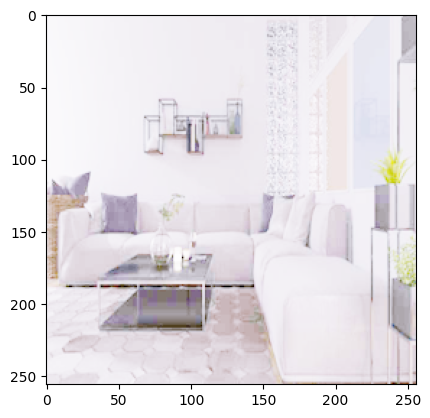

In [ ]:
plt.imshow(np.array(output).reshape(256,256,3))